# Classifying the images as Cat or Dog

> Dataset: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset

This notebook is created in kaggle workspace.

In [1]:
import numpy as np
import pandas as pd 

import os
import tqdm

In [2]:
dir='/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'

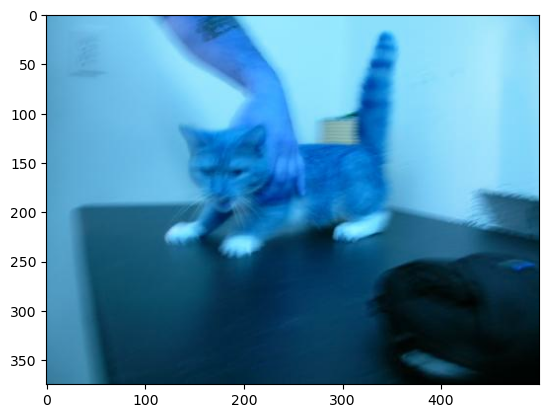

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

img1=cv.imread(dir+'/Cat/0.jpg')
plt.imshow(img1)

# Creating a subset of images to work on.

In [4]:
!mkdir /kaggle/working/train
!mkdir /kaggle/working/train/images

## Generating random names for images

In [5]:
import string

chars=string.printable[:62]

n=np.random.choice(np.arange(62),(5000,10))
names=[''.join([chars[i] for i in j]) for j in n]

## Creating Dataframe

In [6]:
df=pd.DataFrame(columns=['images','category'])
df

,images,category


## Reshaping a subset images of each class into same dimension and saving them in working directory.

> - Since the data set is large (~25000 images), it is not possible to train the model using whole dataset. Hence we use incrimental training in which model is trained with several batches of 4000 images each for 5 epochs. 

### 1. Cats

In [7]:
workingDir='/kaggle/working/train/'
catImgs=os.listdir(dir+'/Cat')

count=0
for i in tqdm.tqdm(catImgs[:2000],desc='Progress...:'):
    img=cv.imread(dir+'/Cat/'+i,0)
    try:
        reshaped=cv.resize(img,(256,256))
        cv.imwrite(workingDir+'images/'+names[count]+'.jpg',reshaped)
        df.loc[count]=[names[count]+'.jpg','Cat']
        count+=1
    except:
        pass


Progress...:: 100%|██████████| 2000/2000 [00:24<00:00, 81.47it/s]


### 2. Dogs

In [8]:
dogImgs=os.listdir(dir+'/Dog')

count=len(df)
for i in tqdm.tqdm(dogImgs[2000],desc='Progress...:'):
    img=cv.imread(dir+'/Dog/'+i,0)
    try:
        reshaped=cv.resize(img,(256,256))
        cv.imwrite(workingDir+'images/'+names[count]+'.jpg',reshaped)
        df.loc[count]=[names[count]+'.jpg','Dog']
        count+=1
    except:
        pass

Progress...:: 100%|██████████| 2000/2000 [00:29<00:00, 68.49it/s]


## Saving Dataframe

In [9]:
df

,images,category
0,mN1DPdVV7O.jpg,Cat
1,hvM5L30R8M.jpg,Cat
2,rrVfqfICjJ.jpg,Cat
3,OeCw8mXyXY.jpg,Cat
4,mHQ0g6SvMp.jpg,Cat
...,...,...
3978,zA1nwGU1ay.jpg,Dog
3979,q1Gjxy5haU.jpg,Dog
3980,CzwOQB0B1Y.jpg,Dog
3981,bHMY9y4AcO.jpg,Dog


Cat


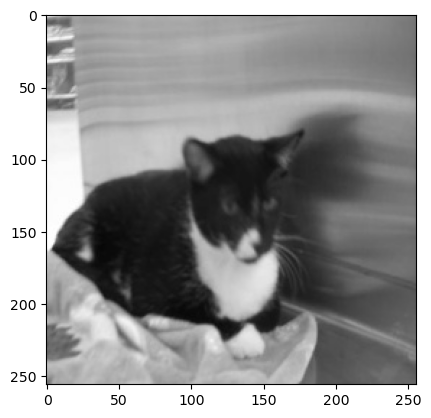

In [10]:
img1=cv.imread(workingDir+'images/'+df.images[6])
print(df.category[6])
plt.imshow(img1)

In [11]:
df.to_csv(workingDir+'data.csv',index=False)

# Defining a model

In [12]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers.core import Dropout
from keras.layers import Convolution2D,Input,MaxPooling2D,Dense,BatchNormalization,Flatten, Rescaling
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [13]:
def modelMaker():
    inp=Input(shape=(256,256,1))
    inp1=Rescaling(1./255)(inp)
    
    c1=Convolution2D(16,(3,3),kernel_initializer='he_normal',activation='relu')(inp1)
    c1=BatchNormalization()(c1)
    c1=MaxPooling2D((2,2))(c1)
    
    c2=Convolution2D(32,(3,3),kernel_initializer='he_normal',activation='relu')(c1)
#     c2=BatchNormalization()(c2)
    c2=MaxPooling2D((2,2))(c2)
#     c2=Dropout(0.5)(c2)
    
    c3=Convolution2D(64,(3,3),kernel_initializer='he_normal',activation='relu')(c2)
#     c3=BatchNormalization()(c2)
    c3=MaxPooling2D((2,2))(c3)
#     c3=Dropout(0.5)(c3)
    
    c4=Convolution2D(128,(3,3),kernel_initializer='he_normal',activation='relu')(c3)
#     c3=BatchNormalization()(c2)
    c4=MaxPooling2D((2,2))(c4)
    c4=Dropout(0.5)(c4)
    
    c5=Convolution2D(256,(3,3),padding='same',strides=(2,2),kernel_initializer='he_normal',activation='relu')(c4)
    c3=BatchNormalization()(c2)
    c5=MaxPooling2D((2,2))(c5)
    
    f=Flatten()(c5)
    
    d1=Dense(1024,activation='relu')(f)
#     d1=Dense(1024,activation='relu')(d1)
    d2=Dense(256,activation='relu')(d1)
    d3=Dense(16,activation='relu')(d2)
    d4=Dense(2,activation='softmax')(d3)
    
    return Model(inputs=inp,outputs=d4)

In [14]:
model=modelMaker()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640  

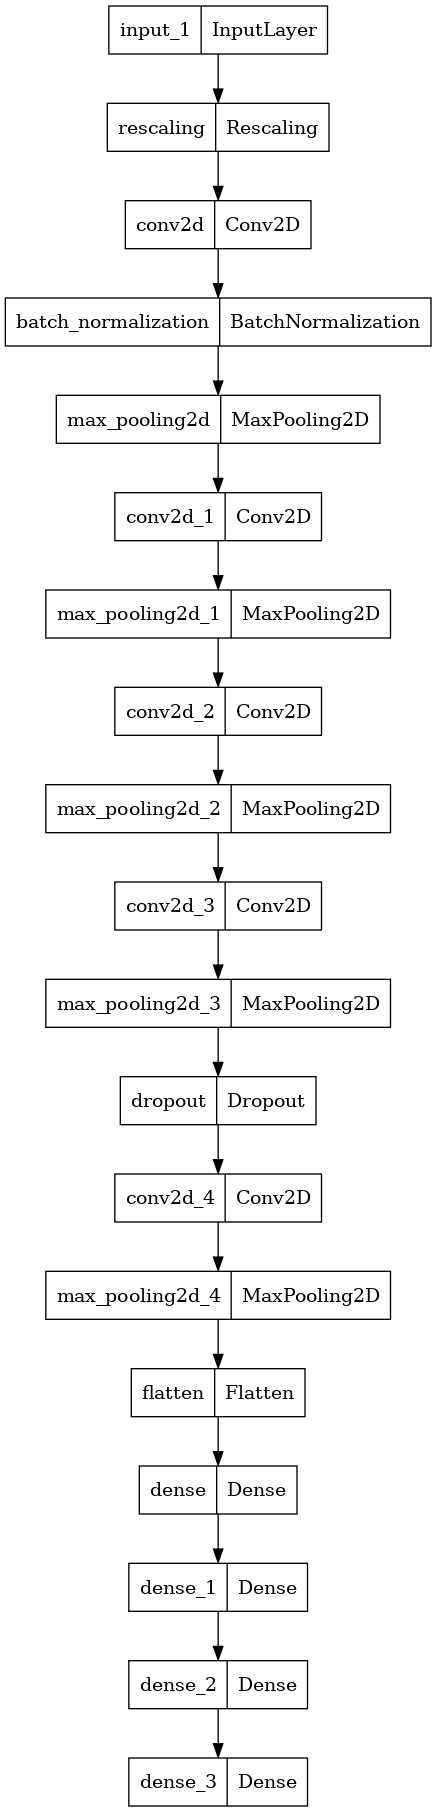

In [15]:
tf.keras.utils.plot_model(model,workingDir+'model.png')

In [16]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

# Reading images and creating train and test sets

In [17]:
from sklearn.model_selection import train_test_split as split

In [18]:
X=np.empty((len(df),256,256,1))
y=np.empty((len(df),1))

In [19]:
for i in tqdm.tqdm(range(len(df)),desc='Progress..:'):
    img=cv.imread(workingDir+'images/'+df.images[i],0)
    X[i,:,:,:]=img.reshape(256,256,1)
    if df.category[i]=='Cat':
        y[i]=0
    else:
        y[i]=1

Progress..:: 100%|██████████| 3983/3983 [00:02<00:00, 1329.85it/s]


In [20]:
y=tf.keras.utils.to_categorical(y,num_classes=2)

In [21]:
Xtrain, Xtest, ytrain, ytest= split(X,y,test_size=0.2,random_state=40)

# Load half-trained model

Since we are training in incriments, we save the model in between to make preserve data. In such cases to load the saved model we use this code.

In [22]:
model=tf.keras.models.load_model('/kaggle/input/catvsdog/model.h5')

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 1)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      160       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640

# Train model and Save

In [24]:
history=model.fit(Xtrain,ytrain,validation_split=0.2,epochs=5)

Epoch 1/7


2023-05-30 13:49:28.511624: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


80/80 [==============================] - 12s 69ms/step - loss: 0.5812 - accuracy: 0.7131 - val_loss: 0.5830 - val_accuracy: 0.6928
Epoch 2/7
80/80 [==============================] - 4s 54ms/step - loss: 0.5333 - accuracy: 0.7394 - val_loss: 0.5479 - val_accuracy: 0.7226
Epoch 3/7
80/80 [==============================] - 4s 55ms/step - loss: 0.4861 - accuracy: 0.7657 - val_loss: 0.5760 - val_accuracy: 0.6850
Epoch 4/7
80/80 [==============================] - 4s 54ms/step - loss: 0.4778 - accuracy: 0.7798 - val_loss: 0.5551 - val_accuracy: 0.7163
Epoch 5/7
80/80 [==============================] - 4s 54ms/step - loss: 0.4249 - accuracy: 0.8010 - val_loss: 0.5296 - val_accuracy: 0.7539
Epoch 6/7
80/80 [==============================] - 4s 53ms/step - loss: 0.3772 - accuracy: 0.8332 - val_loss: 0.5173 - val_accuracy: 0.7602
Epoch 7/7
80/80 [==============================] - 4s 54ms/step - loss: 0.3400 - accuracy: 0.8485 - val_loss: 0.5443 - val_accuracy: 0.7288


In [25]:
del Xtest,ytest,Xtrain,ytrain,X,y,df ## to prevent RAM from crashing we delete used data to free up memory

In [26]:
model.save(workingDir+'modelF1.h5',overwrite=True)

# Plot validation and training losses

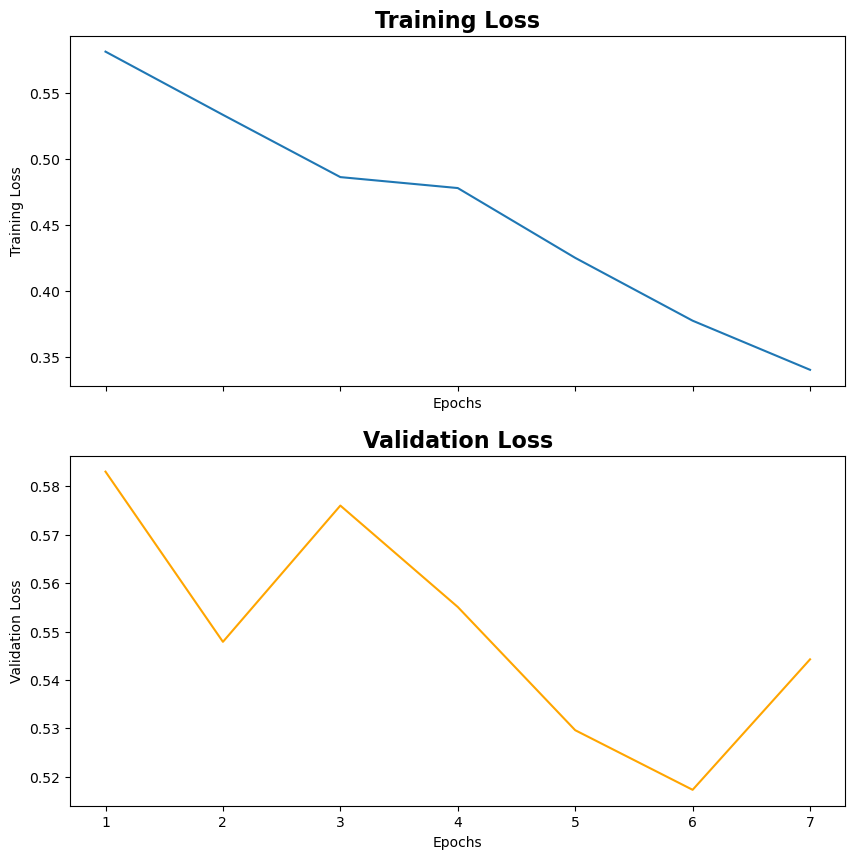

In [28]:
epochs=np.arange(1,8)

fig=plt.figure(figsize=(10,10))
ax=fig.subplots(2,sharex=True)

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training Loss')
ax[0].set_title('Training Loss',fontweight='bold',fontsize='16')
ax[0].plot(epochs,history.history['loss'],label='Training Loss')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Validation Loss')
ax[1].set_title('Validation Loss',fontweight='bold',fontsize='16')
ax[1].plot(epochs,history.history['val_loss'],color='orange',label='Validation Loss')

plt.show()

# Testing the model

We trained the model on 20000 images and use the other 5000 images to test the model.

In [29]:
!mkdir /kaggle/working/test/

In [30]:
testDf=pd.DataFrame(columns=['images','category'])
testDf

,images,category


In [31]:
workingDir='/kaggle/working/test/'
catImgs=os.listdir(dir+'/Cat')

count=0
for i in tqdm.tqdm(catImgs[10000:],desc='Progress...:'):
    img=cv.imread(dir+'/Cat/'+i,0)
    try:
        reshaped=cv.resize(img,(256,256))
        cv.imwrite(workingDir+names[count]+'.jpg',reshaped)
        testDf.loc[count]=[names[count]+'.jpg','Cat']
        count+=1
    except:
        pass

    
print(len(testDf))

Progress...:: 100%|██████████| 2501/2501 [00:32<00:00, 76.95it/s]

2497


In [32]:
count=len(testDf)
for i in tqdm.tqdm(dogImgs[10000:],desc='Progress...:'):
    img=cv.imread(dir+'/Dog/'+i,0)
    try:
        reshaped=cv.resize(img,(256,256))
        cv.imwrite(workingDir+names[count]+'.jpg',reshaped)
        testDf.loc[count]=[names[count]+'.jpg','Dog']
        count+=1
    except:
        pass

Progress...:: 100%|██████████| 2501/2501 [00:28<00:00, 87.11it/s]


In [33]:
testDf

,images,category
0,mN1DPdVV7O.jpg,Cat
1,hvM5L30R8M.jpg,Cat
2,rrVfqfICjJ.jpg,Cat
3,OeCw8mXyXY.jpg,Cat
4,mHQ0g6SvMp.jpg,Cat
...,...,...
4987,bEMObuapTc.jpg,Dog
4988,aMAn2xB8id.jpg,Dog
4989,mNSNKb5l3K.jpg,Dog
4990,64XmJFkded.jpg,Dog


In [34]:
Xtest=np.empty((len(testDf),256,256,1))
ytest=np.empty((len(testDf),1))

In [35]:
for i in tqdm.tqdm(range(len(testDf)),desc='Progress..:'):
    img=cv.imread(workingDir+testDf.images[i],0)
    Xtest[i,:,:,:]=img.reshape(256,256,1)
    if testDf.category[i]=='Cat':
        ytest[i]=0
    else:
        ytest[i]=1

Progress..:: 100%|██████████| 4992/4992 [00:03<00:00, 1297.84it/s]


In [36]:
ypred=model.predict(Xtest)

156/156 [==============================] - 2s 10ms/step


## Evaluation by various metrics

In [37]:
from sklearn.metrics import f1_score,confusion_matrix

In [38]:
f1_score(ytest[:,0],np.round(ypred,0)[:,0])

0.3526484180590117

In [39]:
confusion_matrix(ytest[:,0],np.round(ypred,0)[:,0],labels=[0,1])

array([[ 358, 2139],
       [1503,  992]])

In [40]:
model.evaluate(Xtest,ytest)

156/156 [==============================] - 2s 11ms/step - loss: 1.1488 - accuracy: 0.6272


[1.1488438844680786, 0.6272035241127014]